### Importing Required Library

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils import np_utils
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Loading MNIST Dataset

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
y_train[0]

5

### Plot 

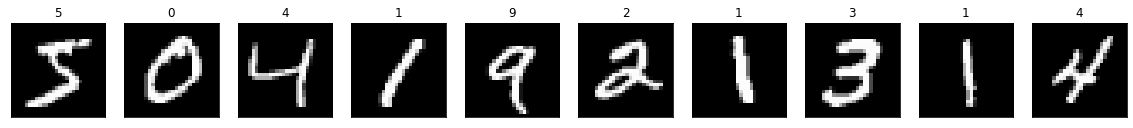

In [13]:
fig, ax = plt.subplots(ncols = 10, sharex = False, sharey = True, figsize = (20, 4))
for i in range(10):
    ax[i].set_title(y_train[i])
    ax[i].imshow(x_train[i], cmap = 'gray')
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
plt.show()

### Change the shape of x_train and x_test

In [14]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [15]:
x_train.shape

(60000, 28, 28, 1)

### Convert x_train and x_test into float value

In [16]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

### Normalizing 

In [18]:
x_train /= 255
x_test /= 255

### Canvert into categorical value

In [19]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [20]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Sequential Model

In [24]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(10, activation = 'softmax'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


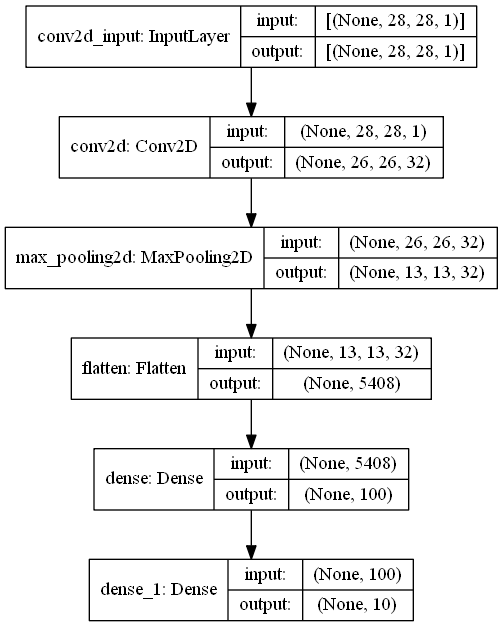

In [26]:
utils.plot_model(model, show_shapes = True)

### Compile Model

In [32]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

### Train Model

In [33]:
train_model = model.fit(x_train, y_train, epochs = 2, batch_size = 32, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/2
1875/1875 [==============================] - 95s 50ms/step - loss: 0.2011 - accuracy: 0.9409 - val_loss: 23.9012 - val_accuracy: 0.9432
Epoch 2/2
1875/1875 [==============================] - 94s 50ms/step - loss: 0.1555 - accuracy: 0.9542 - val_loss: 17.6339 - val_accuracy: 0.9580


### Saving the model

In [34]:
model.save('cnn_mnist_model.h5')

### Plot Model Loss and Accuracy

#### Loss plot

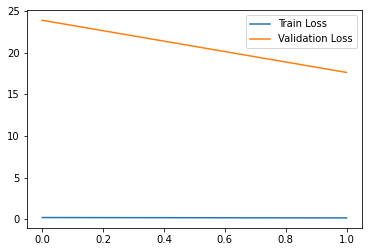

In [35]:
plt.plot(train_model.history['loss'], label = 'Train Loss')
plt.plot(train_model.history['val_loss'], label = 'Validation Loss')
plt.legend()

#### Accuracy plot

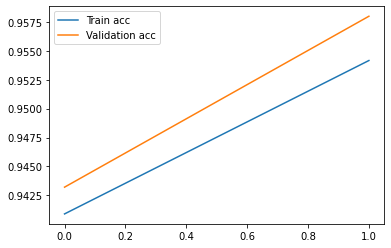

In [36]:
plt.plot(train_model.history['accuracy'], label = 'Train acc')
plt.plot(train_model.history['val_accuracy'], label = 'Validation acc')
plt.legend()

### Loading The Model

In [37]:
model = keras.models.load_model('cnn_mnist_model.h5')

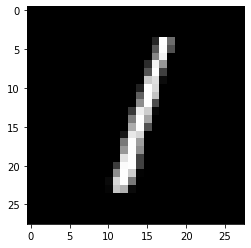

In [38]:
plt.imshow(x_test[2], cmap = 'gray')

### Reshape the x_test value and Predict

In [43]:
x = np.reshape(x_test[2], (1,28, 28, 1))
np.argmax(model.predict(x))

1

In [44]:
model.predict(x)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)